# Hyperparameters searches and Ensemble methods

Using the Sklearn wine data set

This is a classification problem,  a relatively simple one

We will load the typical sklearn variable of type "bunch"

From there, we can see the data, targets, targetnames, etc

Checked on 1/17/2023
Use a GPU,  but extended memory size is not needed.

In [29]:
from sklearn.datasets import load_wine
data = load_wine()
data.target[[10, 80, 140]]
list(data.target_names)


['class_0', 'class_1', 'class_2']

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [32]:
X=data.data

In [33]:
X.shape

(178, 13)

In [34]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [35]:
y=data.target

Okay, this is some sort of wine category prediction problem, with three wine classes to work with and 13 predictors

We'll just use the Sklearn ML classifier

In [36]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-5, random_state=1, max_iter=500,hidden_layer_sizes=(13,6,), verbose=True, warm_start=False)

clf.fit(X, y)

Iteration 1, loss = 24.09660049
Iteration 2, loss = 24.09660049
Iteration 3, loss = 24.09660048
Iteration 4, loss = 24.09660048
Iteration 5, loss = 24.09660048
Iteration 6, loss = 24.09660048
Iteration 7, loss = 24.09660048
Iteration 8, loss = 24.09337392
Iteration 9, loss = 24.08267310
Iteration 10, loss = 24.06169735
Iteration 11, loss = 24.02875921
Iteration 12, loss = 23.98025904
Iteration 13, loss = 23.91843997
Iteration 14, loss = 23.81706271
Iteration 15, loss = 23.70178287
Iteration 16, loss = 23.56577742
Iteration 17, loss = 23.39115545
Iteration 18, loss = 23.18819268
Iteration 19, loss = 22.93043666
Iteration 20, loss = 22.60267785
Iteration 21, loss = 22.21451097
Iteration 22, loss = 21.80480270
Iteration 23, loss = 21.30485896
Iteration 24, loss = 20.73901233
Iteration 25, loss = 20.13341803
Iteration 26, loss = 19.45853728
Iteration 27, loss = 18.73599123
Iteration 28, loss = 17.93735413
Iteration 29, loss = 17.00272158
Iteration 30, loss = 16.00393751
Iteration 31, loss 

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(13, 6), max_iter=500,
              random_state=1, verbose=True)

##  What Hyperparameters are in this model?

class sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)[source]


What could we hyperparameter search on?

hidden_layer_sizes - change numbers of neurons, number of layers

solver -adam, sgd- different gradient descent algorithms

alpha- this is the L2 regularization parameter

batch size-   might alter speed,   unlikely to alter minima?

early_stopping- monitors change in cross validation error when set to true

The primary variables for us seem to be the hidden_layer_sizes and L2


---
Below,  we will just search on the hidden layer sizes and number of layers,   and also the alpha value,   note that the alpha value limits overfitting, is an L2-norm penalty




In [37]:
## Grid search the hyperparameter values

from sklearn.model_selection import GridSearchCV

param_grid = {'hidden_layer_sizes':[(13,6,), (6,3,),(19,12,),(6,3,3,)],'alpha':[0.0001,0.001, 0.01]}

clf2 = MLPClassifier(max_iter=2000)

grid_search=GridSearchCV(clf2,param_grid, cv=3,return_train_score=True, scoring='accuracy')

grid_search.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=2000),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(13, 6), (6, 3), (19, 12),
                                                (6, 3, 3)]},
             return_train_score=True, scoring='accuracy')

In [38]:
grid_search.best_params_

{'alpha': 0.0001, 'hidden_layer_sizes': (19, 12)}

In [39]:
grid_search.best_estimator_

MLPClassifier(hidden_layer_sizes=(19, 12), max_iter=2000)

In [40]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print((mean_score), params)

0.39359698681732586 {'alpha': 0.0001, 'hidden_layer_sizes': (13, 6)}
0.33145009416195853 {'alpha': 0.0001, 'hidden_layer_sizes': (6, 3)}
0.8198681732580039 {'alpha': 0.0001, 'hidden_layer_sizes': (19, 12)}
0.31450094161958564 {'alpha': 0.0001, 'hidden_layer_sizes': (6, 3, 3)}
0.6256120527306969 {'alpha': 0.001, 'hidden_layer_sizes': (13, 6)}
0.5039548022598871 {'alpha': 0.001, 'hidden_layer_sizes': (6, 3)}
0.4218455743879473 {'alpha': 0.001, 'hidden_layer_sizes': (19, 12)}
0.32542372881355935 {'alpha': 0.001, 'hidden_layer_sizes': (6, 3, 3)}
0.3536723163841808 {'alpha': 0.01, 'hidden_layer_sizes': (13, 6)}
0.5092278719397364 {'alpha': 0.01, 'hidden_layer_sizes': (6, 3)}
0.6064971751412429 {'alpha': 0.01, 'hidden_layer_sizes': (19, 12)}
0.487758945386064 {'alpha': 0.01, 'hidden_layer_sizes': (6, 3, 3)}


## Question:  what was the best model you found?

Can you alter the batch size to see if this has any effect?  Figure out the current batch size and try batches 1/2 the size and twice the size in a grid search?
-

Indicate your optimal hyperparameter values
- Optimal hyperparameter {'batch_size': 100}


In [41]:
## Grid search the hyperparameter values

from sklearn.model_selection import GridSearchCV

param_grid = {'batch_size':[200, 100, 400]}

clf2 = MLPClassifier(max_iter=2000)

grid_search=GridSearchCV(clf2,param_grid, cv=3,return_train_score=True, scoring='accuracy')

grid_search.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=2000),
             param_grid={'batch_size': [200, 100, 400]},
             return_train_score=True, scoring='accuracy')

In [42]:
grid_search.best_params_

{'batch_size': 100}

In [43]:
grid_search.best_estimator_

MLPClassifier(batch_size=100, max_iter=2000)

# set up a KNN classifier for this data set using the KNN predictor in sklearn for this data set

Do a hyperparameter search, using:

-variable numbers of neighbors

-use weights equal "uniform" or "distance"

-use p=1 (manhattan distance) or p=2 (euclidean distance)



# Build a linear model based classifier

use the sklearn.linear_model.SGDClassifier to build a linear classifier for this data set

Do a hyperparameter search using

penalty = "l2","l1","elasticnet",   to try ridge regression, lasso and elasticnet forms of the model

alpha= this is the regularization parameter, try 0.0001, 0.001, 0.01



# Ensemble based approaches

This is the idea of the prediction of multiple models, to achieve higher performance than any single model on it's own.   Ensembles work best when the models operate on
entirely different principles,   not on models which are simply mild variations on one another

The simplest approach is to use a vote of multiple models

In [47]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [48]:
clf_ML = MLPClassifier(solver='adam', alpha=1e-5, random_state=1, max_iter=4000,hidden_layer_sizes=(13,6,3,), warm_start=False)

clf_neigh = KNeighborsClassifier(n_neighbors=2)

log_clf = LogisticRegression(max_iter=3000)

In [49]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('ML', clf_ML), ('KNN', clf_neigh)],
    voting='hard')

voting_clf.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=3000)),
                             ('ML',
                              MLPClassifier(alpha=1e-05,
                                            hidden_layer_sizes=(13, 6, 3),
                                            max_iter=4000, random_state=1)),
                             ('KNN', KNeighborsClassifier(n_neighbors=2))])

In [50]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, clf_neigh, clf_ML, voting_clf):
    clf.fit(X, y)
    y_pred = clf.predict(X)
    print(clf.__class__.__name__, accuracy_score(y, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 0.9943820224719101
KNeighborsClassifier 0.8764044943820225
MLPClassifier 0.6123595505617978
VotingClassifier 0.8820224719101124


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In my example, the ML classifier does not do well,  and the straight vote of the three classifiers doesn't peform well.  

-> Try this using your optimized models (after the HyperParameter tuning) and see what result you get


## Soft voting

Instead of using a straight vote among the three classifiers,   we can average the probability outputs (proba) from each product,  so instead of a pure
vote,  we have a vote weighted by the probabilities of class membership, this will tend to perform better

Try this using your optimized models

In [51]:
voting_clf2 = VotingClassifier(
    estimators=[('lr', log_clf), ('ML', clf_ML), ('KNN', clf_neigh)],
    voting='soft')

In [52]:
for clf in (log_clf, clf_neigh, clf_ML, voting_clf2):
    clf.fit(X, y)
    y_pred = clf.predict(X)
    print(clf.__class__.__name__, accuracy_score(y, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 0.9943820224719101
KNeighborsClassifier 0.8764044943820225
MLPClassifier 0.6123595505617978
VotingClassifier 0.9831460674157303


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
# A voting regressor model

In [55]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

 # Loading some example data
X, y = load_diabetes(return_X_y=True)

# Training classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg = ereg.fit(X, y)

In [56]:
from sklearn.metrics import mean_squared_error
for reg in (reg1,reg2,reg3,ereg):
    reg.fit(X, y)
    y_pred = reg.predict(X)
    print(reg.__class__.__name__, mean_squared_error(y, y_pred))

GradientBoostingRegressor 1191.674401543896
RandomForestRegressor 458.5639981900453
LinearRegression 2859.69634758675
VotingRegressor 1248.6228338450192


In [58]:
xt = X[:20]

pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = ereg.predict(xt)

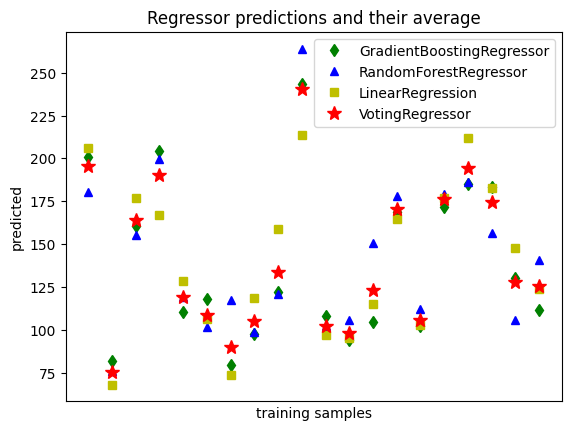

In [59]:
plt.figure()
plt.plot(pred1, "gd", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "ys", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()

In [60]:
ereg2 = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2)])
ereg2 = ereg2.fit(X, y)

In [62]:
for reg in (reg1,reg2,ereg2):
    reg.fit(X, y)
    y_pred = reg.predict(X)
    print(reg.__class__.__name__, mean_squared_error(y, y_pred))

GradientBoostingRegressor 1191.674401543896
RandomForestRegressor 458.5639981900453
VotingRegressor 750.9659147588727
